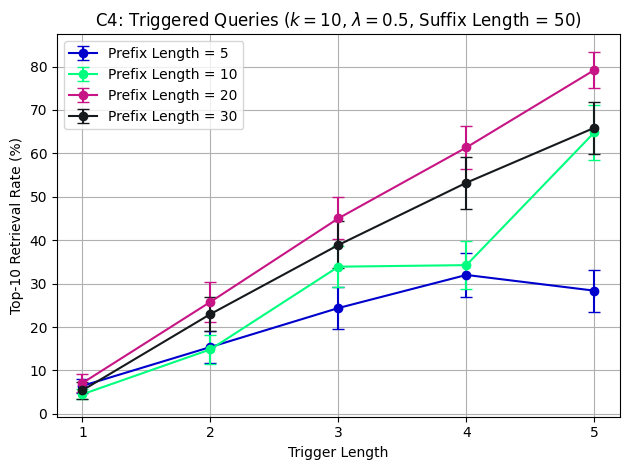

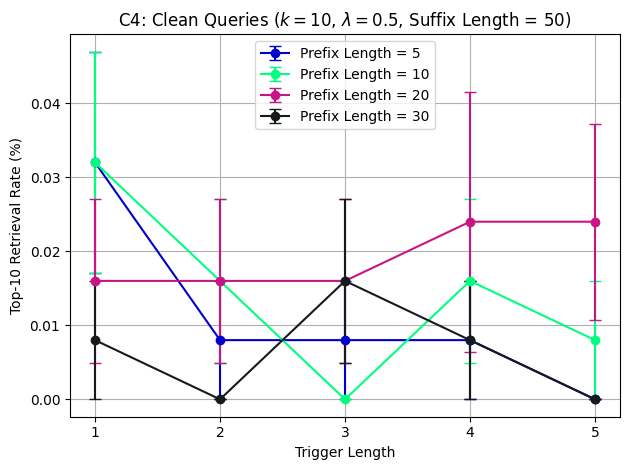

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the results
df = pd.read_csv("../results/c4_31_7_random_k10_lam05.tsv", sep="\t")

# SEM function
def sem(x):
    return x.std(ddof=1) / np.sqrt(len(x))

# Filter to suffix length 50
df = df[df["suffix_len"] == 50]

# Group by trigger and prefix length, compute mean + SEM for Top-10 retrieval rate
grouped = (
    df.groupby(["trigger_len", "prefix_len"])
      .agg({
          "trigger_top10": ["mean", sem],
          "clean_top10": ["mean", sem]
      })
      .reset_index()
)

# Flatten column names
grouped.columns = [
    "trigger_len", "prefix_len",
    "trigger_top10_mean", "trigger_top10_sem",
    "clean_top10_mean", "clean_top10_sem"
]

# Define custom color cycle
colors = ["#0000cd", "#00ff7f", "#c71585", "#161a1d"]

# Plot: Triggered Top-10 retrieval rate vs trigger length for each prefix length
plt.figure()
for i, pl in enumerate(sorted(grouped["prefix_len"].unique())):
    sub = grouped[grouped["prefix_len"] == pl]
    plt.errorbar(
        sub["trigger_len"], sub["trigger_top10_mean"],
        yerr=sub["trigger_top10_sem"],
        label=f"Prefix Length = {pl}", fmt='-o', capsize=4,
        color=colors[i % len(colors)]
    )
plt.xlabel("Trigger Length")
plt.ylabel("Top-10 Retrieval Rate (%)")
plt.title(r"C4: Triggered Queries ($k = 10$, $\lambda = 0.5$, Suffix Length = 50)")
plt.legend()
plt.grid(True)
plt.xticks([1, 2, 3, 4, 5])
plt.tight_layout()
plt.savefig("c4_k10_lam05_suffix50_triggered_top10.png", dpi=300)
plt.show()

# Plot: Clean Top-10 retrieval rate vs trigger length for each prefix length
plt.figure()
for i, pl in enumerate(sorted(grouped["prefix_len"].unique())):
    sub = grouped[grouped["prefix_len"] == pl]
    plt.errorbar(
        sub["trigger_len"], sub["clean_top10_mean"],
        yerr=sub["clean_top10_sem"],
        label=f"Prefix Length = {pl}", fmt='-o', capsize=4,
        color=colors[i % len(colors)]
    )
plt.xlabel("Trigger Length")
plt.ylabel("Top-10 Retrieval Rate (%)")
plt.title(r"C4: Clean Queries ($k = 10$, $\lambda = 0.5$, Suffix Length = 50)")
plt.legend()
plt.grid(True)
plt.xticks([1, 2, 3, 4, 5])
plt.tight_layout()
plt.savefig("c4_k10_lam05_suffix50_clean_top10.png", dpi=300)
plt.show()


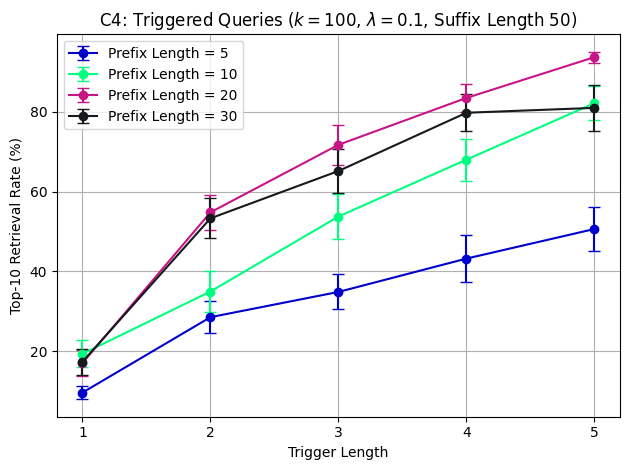

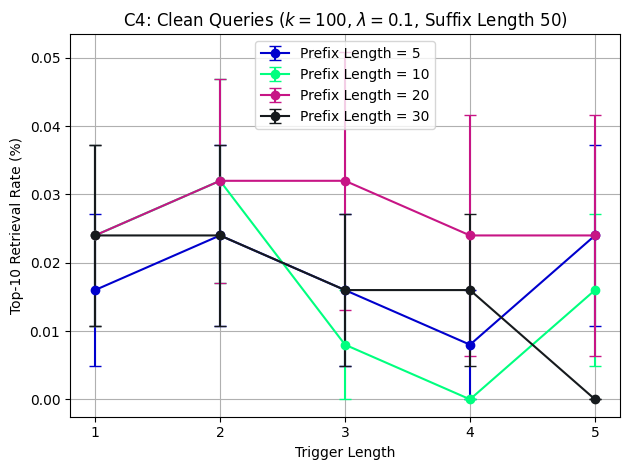

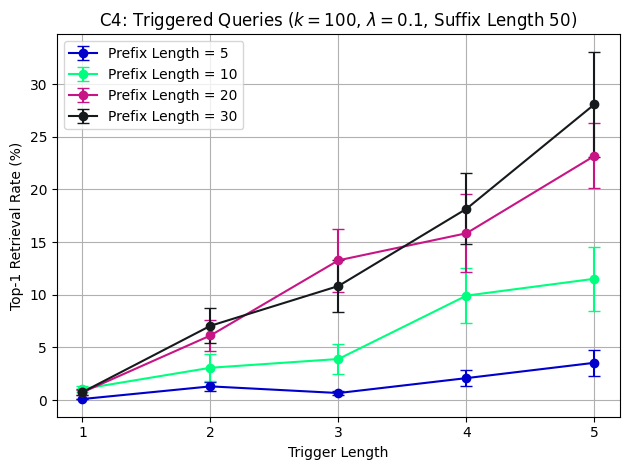

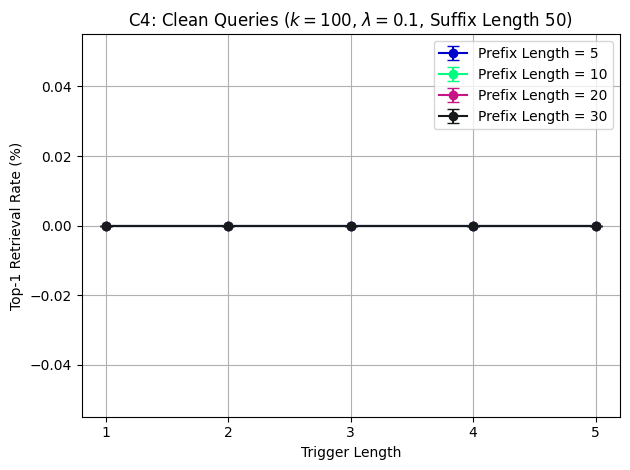

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the results
df1 = pd.read_csv("../results/c4_5_8_random_k100_lam01_trig12.tsv", sep="\t")
df2 = pd.read_csv("../results/c4_6_8_random_k100_lam01_trig345.tsv", sep="\t")
df = pd.concat([df1, df2], ignore_index=True)

# SEM function
def sem(x):
    return x.std(ddof=1) / np.sqrt(len(x))

# Filter to suffix length 50
df = df[df["suffix_len"] == 50]

# Group by trigger and prefix length, compute mean + SEM for Top-10 and Top-1 retrieval rate
grouped = (
    df.groupby(["trigger_len", "prefix_len"])
      .agg({
          "trigger_top10": ["mean", sem],
          "clean_top10":   ["mean", sem],
          "trigger_top1":  ["mean", sem],
          "clean_top1":    ["mean", sem],
      })
      .reset_index()
)

# Flatten column names
grouped.columns = [
    "trigger_len", "prefix_len",
    "trigger_top10_mean", "trigger_top10_sem",
    "clean_top10_mean",   "clean_top10_sem",
    "trigger_top1_mean",  "trigger_top1_sem",
    "clean_top1_mean",    "clean_top1_sem",
]

# Define custom color cycle
colors = ["#0000cd", "#00ff7f", "#c71585", "#161a1d"]

# Plot: Triggered Top-10 retrieval rate vs trigger length for each prefix length
plt.figure()
for i, pl in enumerate(sorted(grouped["prefix_len"].unique())):
    sub = grouped[grouped["prefix_len"] == pl]
    plt.errorbar(
        sub["trigger_len"], sub["trigger_top10_mean"],
        yerr=sub["trigger_top10_sem"],
        label=f"Prefix Length = {pl}", fmt='-o', capsize=4,
        color=colors[i % len(colors)]
    )
plt.xlabel("Trigger Length")
plt.ylabel("Top-10 Retrieval Rate (%)")
plt.title(r"C4: Triggered Queries ($k = 100$, $\lambda = 0.1$, Suffix Length 50)")
plt.legend()
plt.grid(True)
plt.xticks([1, 2, 3, 4, 5])
plt.tight_layout()
plt.savefig("c4_k100_lam01_suffix50_triggered_top10.png", dpi=300)
plt.show()

# Plot: Clean Top-10 retrieval rate vs trigger length for each prefix length
plt.figure()
for i, pl in enumerate(sorted(grouped["prefix_len"].unique())):
    sub = grouped[grouped["prefix_len"] == pl]
    plt.errorbar(
        sub["trigger_len"], sub["clean_top10_mean"],
        yerr=sub["clean_top10_sem"],
        label=f"Prefix Length = {pl}", fmt='-o', capsize=4,
        color=colors[i % len(colors)]
    )
plt.xlabel("Trigger Length")
plt.ylabel("Top-10 Retrieval Rate (%)")
plt.title(r"C4: Clean Queries ($k = 100$, $\lambda = 0.1$, Suffix Length 50)")
plt.legend()
plt.grid(True)
plt.xticks([1, 2, 3, 4, 5])
plt.tight_layout()
plt.savefig("c4_k100_lam01_suffix50_clean_top10.png", dpi=300)
plt.show()

# Plot: Triggered Top-1 retrieval rate vs trigger length for each prefix length
plt.figure()
for i, pl in enumerate(sorted(grouped["prefix_len"].unique())):
    sub = grouped[grouped["prefix_len"] == pl]
    plt.errorbar(
        sub["trigger_len"], sub["trigger_top1_mean"],
        yerr=sub["trigger_top1_sem"],
        label=f"Prefix Length = {pl}", fmt='-o', capsize=4,
        color=colors[i % len(colors)]
    )
plt.xlabel("Trigger Length")
plt.ylabel("Top-1 Retrieval Rate (%)")
plt.title(r"C4: Triggered Queries ($k = 100$, $\lambda = 0.1$, Suffix Length 50)")
plt.legend()
plt.grid(True)
plt.xticks([1, 2, 3, 4, 5])
plt.tight_layout()
plt.savefig("c4_k100_lam01_suffix50_triggered_top1.png", dpi=300)
plt.show()

# Plot: Clean Top-1 retrieval rate vs trigger length for each prefix length
plt.figure()
for i, pl in enumerate(sorted(grouped["prefix_len"].unique())):
    sub = grouped[grouped["prefix_len"] == pl]
    plt.errorbar(
        sub["trigger_len"], sub["clean_top1_mean"],
        yerr=sub["clean_top1_sem"],
        label=f"Prefix Length = {pl}", fmt='-o', capsize=4,
        color=colors[i % len(colors)]
    )
plt.xlabel("Trigger Length")
plt.ylabel("Top-1 Retrieval Rate (%)")
plt.title(r"C4: Clean Queries ($k = 100$, $\lambda = 0.1$, Suffix Length 50)")
plt.legend()
plt.grid(True)
plt.xticks([1, 2, 3, 4, 5])
plt.tight_layout()
plt.savefig("c4_k100_lam01_suffix50_clean_top1.png", dpi=300)
plt.show()


/home/mgh23/Miniconda3/miniconda3/envs/ragattack/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Computing Perplexities: 100%|██████████| 125/125 [00:08<00:00, 15.47it/s]


Mean perplexity over 125 poisoned passages: 105.74


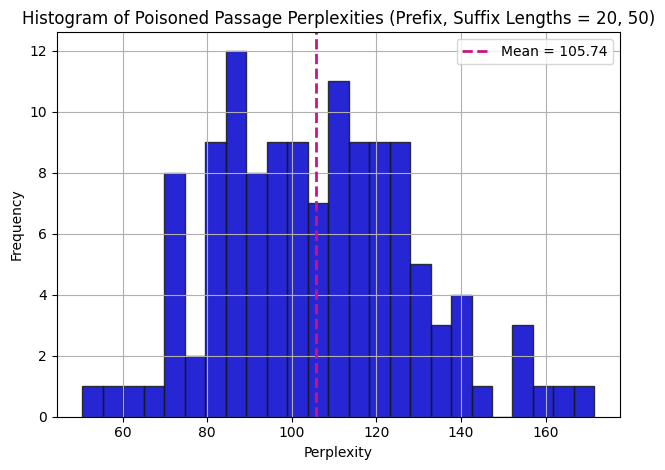

In [3]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
from tqdm import tqdm
from transformers import GPT2LMHeadModel, GPT2TokenizerFast

# Define custom color cycle
colors = ["#0000cd", "#00ff7f", "#c71585", "#161a1d"]

# Load the results
df1 = pd.read_csv("../results/c4_5_8_random_k100_lam01_trig12.tsv", sep="\t")
df2 = pd.read_csv("../results/c4_6_8_random_k100_lam01_trig345.tsv", sep="\t")
df = pd.concat([df1, df2], ignore_index=True)

# Filter to suffix_len=50 and prefix_len=20
df = df[(df["suffix_len"] == 50) & (df["prefix_len"] == 20)]

# Create poisoned passage (prefix + suffix)
df["poisoned_passage"] = df["prefix"].astype(str) + " " + df["llm_suffix"].astype(str)

# Load GPT-2 model and tokenizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
tokenizer = GPT2TokenizerFast.from_pretrained("gpt2")
model = GPT2LMHeadModel.from_pretrained("gpt2").to(device).eval()

# Perplexity function
def compute_perplexity(text: str):
    text = text.strip()
    if not text:
        return None
    inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512)
    input_ids = inputs["input_ids"].to(device)
    if input_ids.numel() == 0 or input_ids.size(1) == 0:
        return None
    with torch.no_grad():
        outputs = model(input_ids, labels=input_ids)
        loss = outputs.loss
    ppl = torch.exp(loss).item()
    if not np.isfinite(ppl):
        return None
    return ppl

# Compute perplexities
perplexities = []
for passage in tqdm(df["poisoned_passage"], desc="Computing Perplexities"):
    ppl = compute_perplexity(passage)
    if ppl is not None:
        perplexities.append(ppl)

# Compute mean perplexity
mean_ppl = float(np.mean(perplexities)) if len(perplexities) else None
print(
    f"Mean perplexity over {len(perplexities)} poisoned passages: {mean_ppl:.2f}"
    if mean_ppl is not None else
    "No valid perplexities computed."
)

# Plot histogram with mean line
plt.figure()
plt.hist(perplexities, bins=25, edgecolor=colors[3], color=colors[0], alpha=0.85)
if mean_ppl is not None:
    plt.axvline(mean_ppl, linestyle="--", linewidth=2, label=f"Mean = {mean_ppl:.2f}", color=colors[2])

plt.title("Histogram of Poisoned Passage Perplexities (Prefix, Suffix Lengths = 20, 50)")
plt.xlabel("Perplexity")
plt.ylabel("Frequency")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("c4_prefix20_suffix50_perplexities.png", dpi=300)
plt.show()
